<h1>Diabetes Predictor
</h1>

<h3>First Import</h3>

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

df=pd.read_csv('.\data\Diabetes\DiabetesData.csv')


print(df.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

<h3>Null Value Checking</h3>

In [2]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

<h3>Missing Value Checking</h3>

In [3]:
def count_the_missing_values_of_each_column(df):
    missing_values_series = df.isnull().sum()
    return missing_values_series
    
missing_values_series = count_the_missing_values_of_each_column(df)
print(missing_values_series)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


<h3>Duplicate Checking</h3>

In [4]:
df.duplicated().sum()
df.drop_duplicates()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
df.shape

(253680, 22)

In [6]:
df['Diabetes']=df['Diabetes_012']
df.drop(columns='Diabetes_012', inplace=True)

In [7]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


<h3>Data Visualization</h3>

<h4>Data Visualizaiton of Categorical Features</h4>

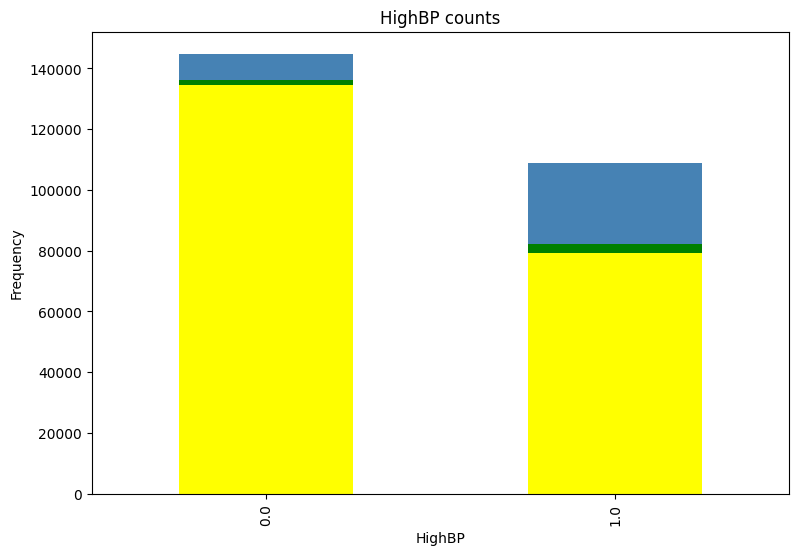

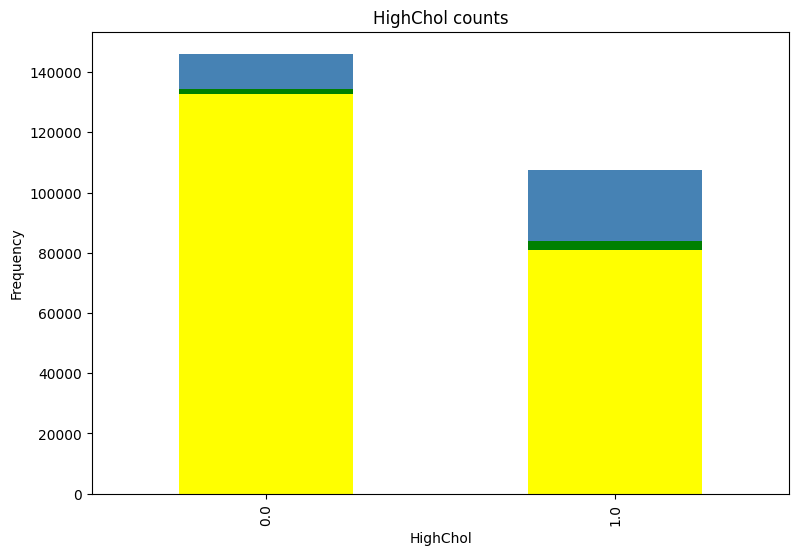

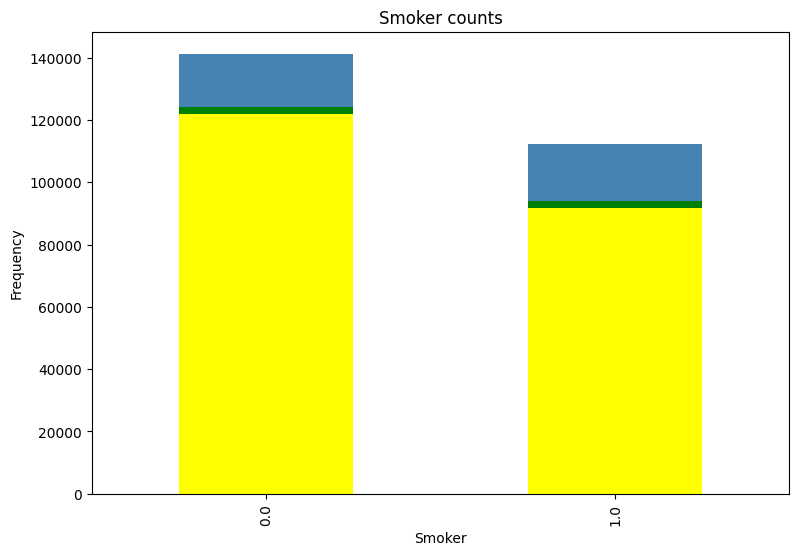

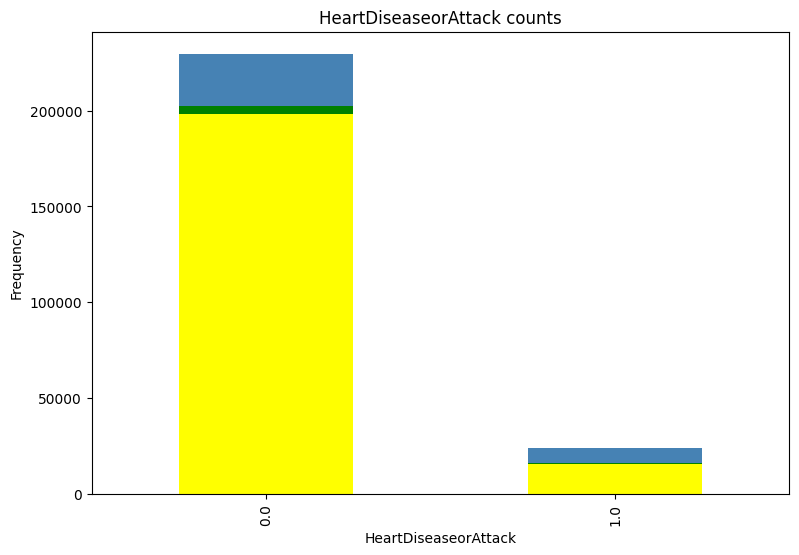

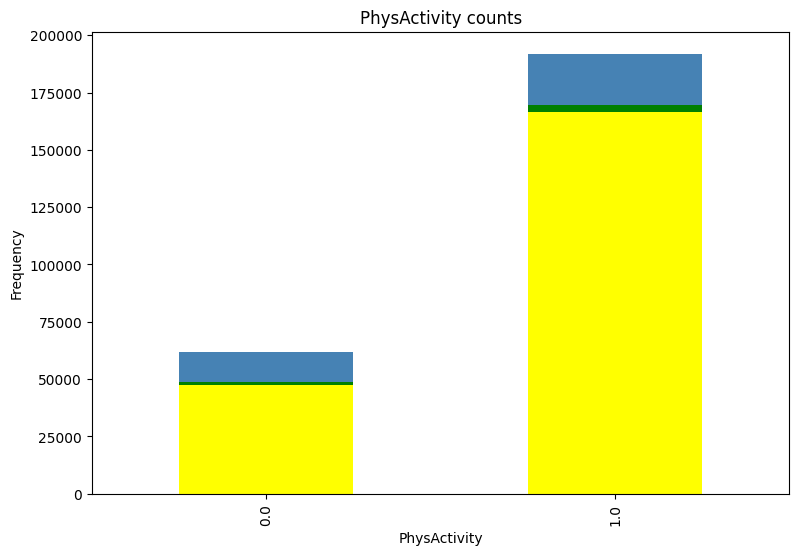

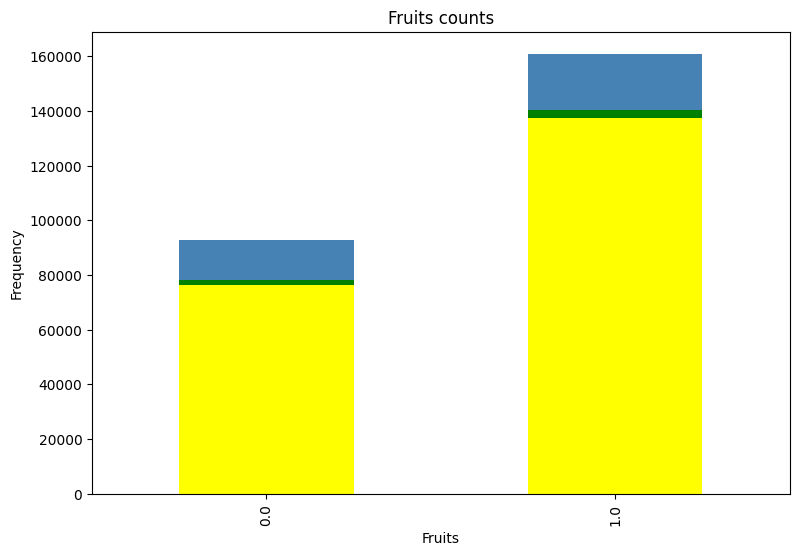

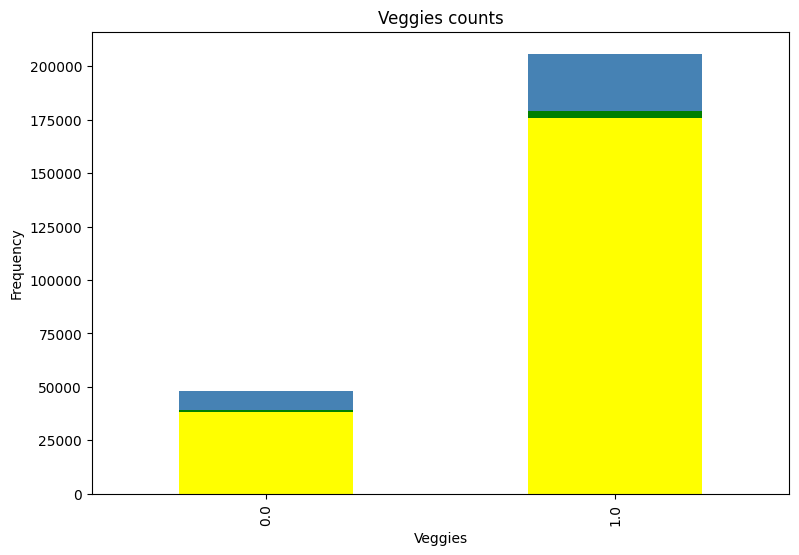

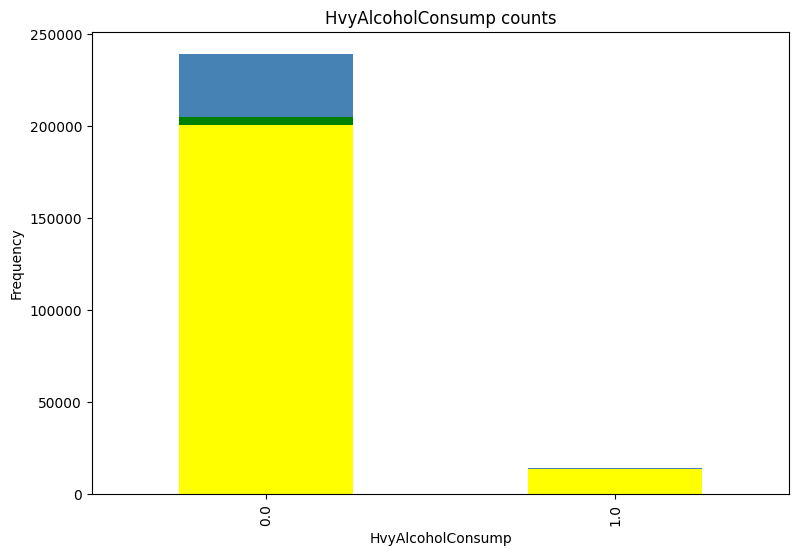

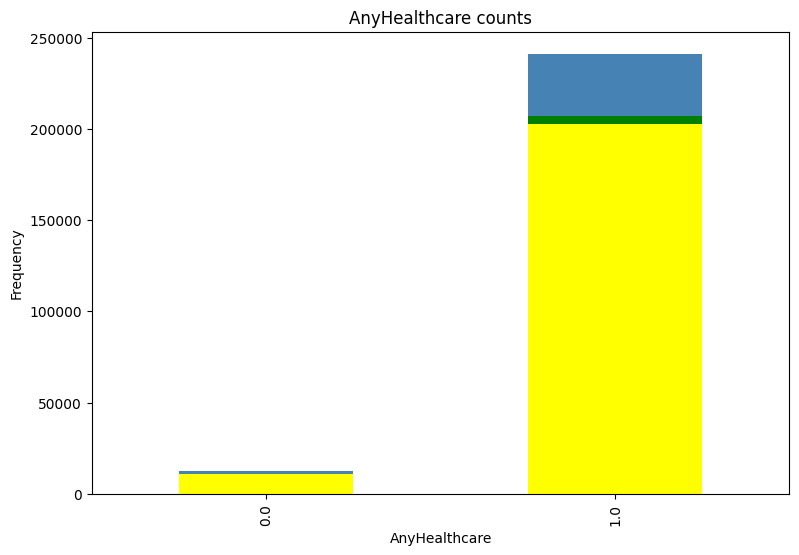

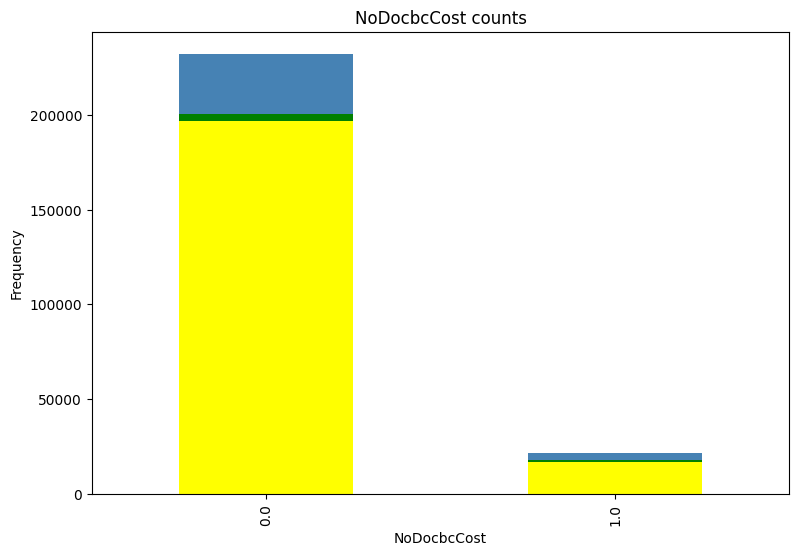

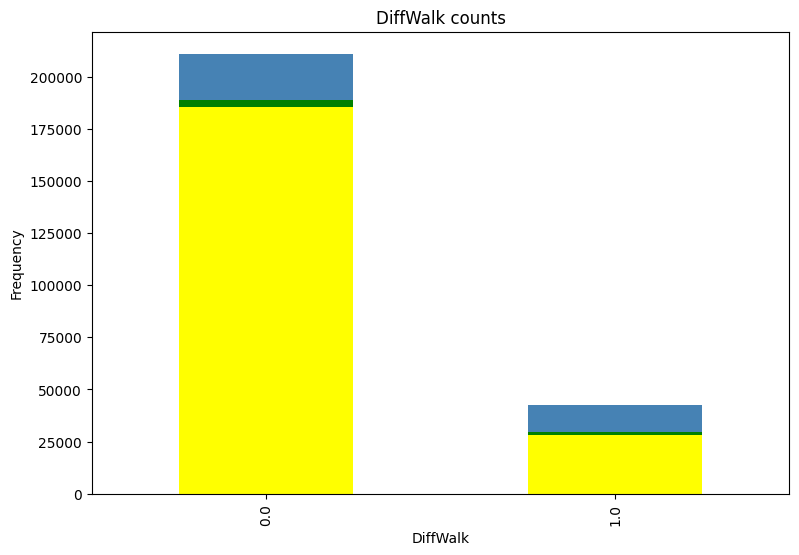

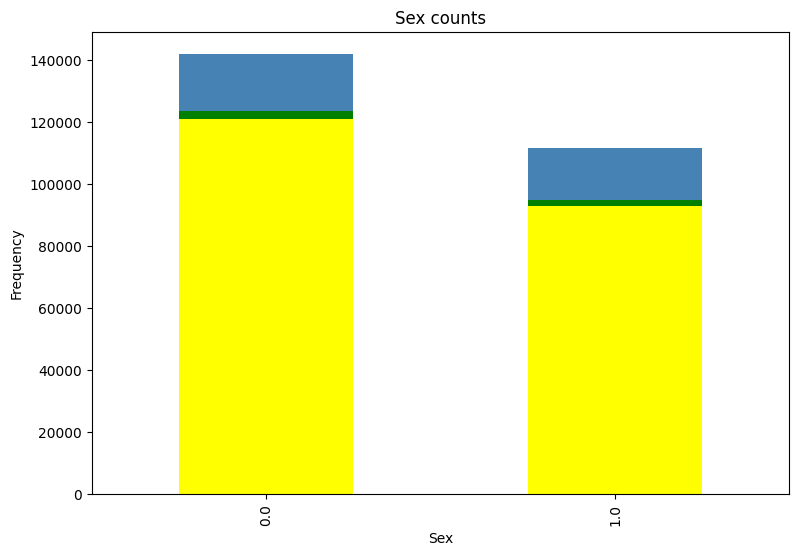

In [8]:
def plot_barchart(df, col): 
    
    negative_counts=df[col][df['Diabetes']==0.0].groupby(df[col]).count()
    pre_counts=df[col][df['Diabetes']==1.0].groupby(df[col]).count()
    positive_counts=df[col][df['Diabetes']==2.0].groupby(df[col]).count()

    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    positive_counts.plot.bar(ax = ax, color='steelblue',bottom=pre_counts+negative_counts)
    negative_counts.plot.bar(ax = ax, color='yellow')
    pre_counts.plot.bar(ax = ax, color='green',bottom=negative_counts)

    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")

categorical_features = ['HighBP', 'HighChol', 'Smoker', 'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']


for col in categorical_features:
    plot_barchart(df, col)

<h4>Data Visualization of Numerical Features</h4>

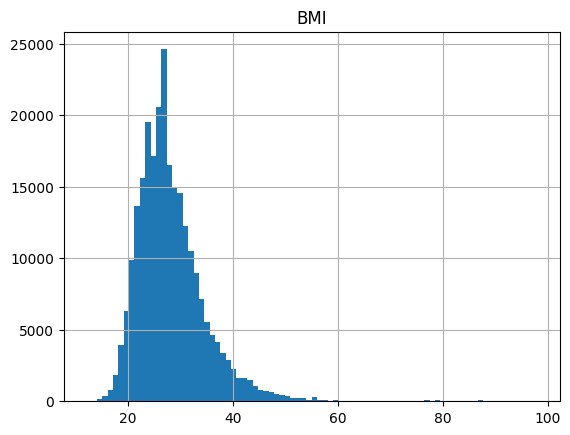

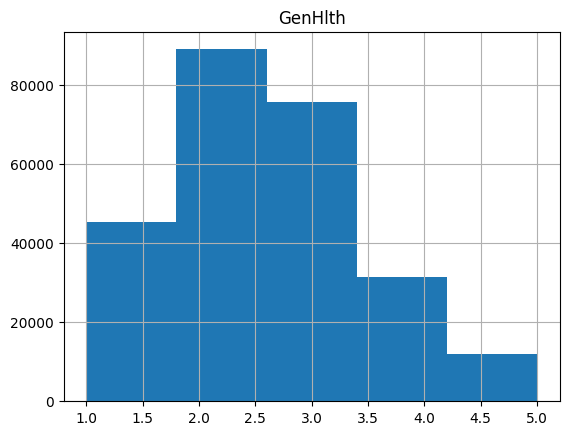

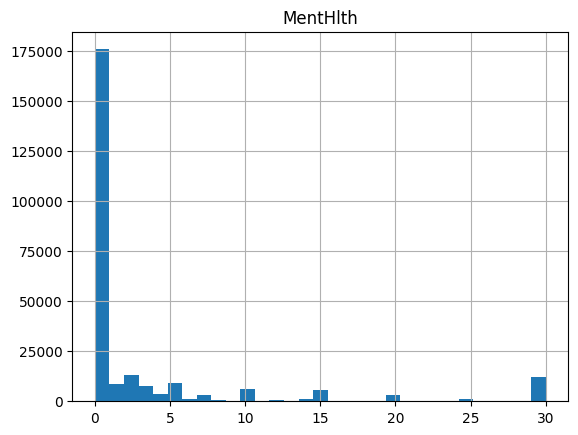

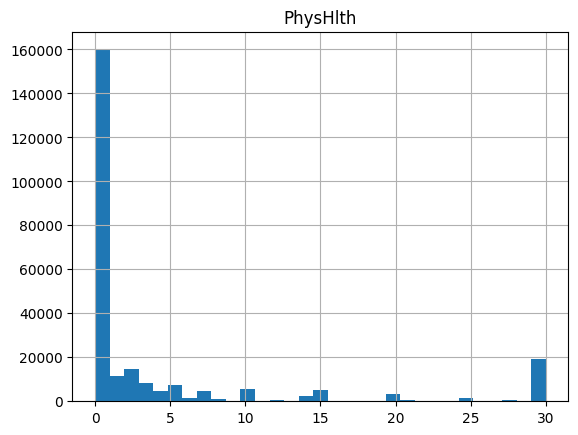

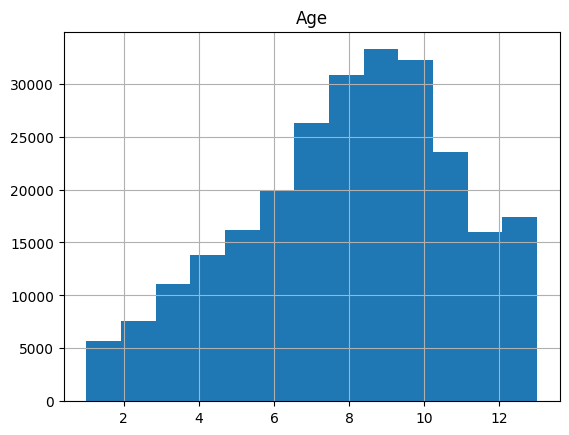

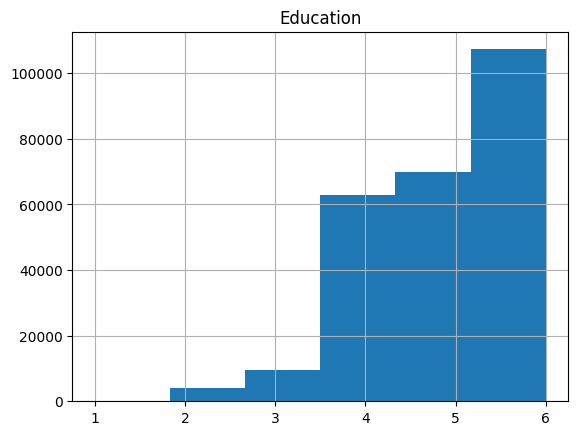

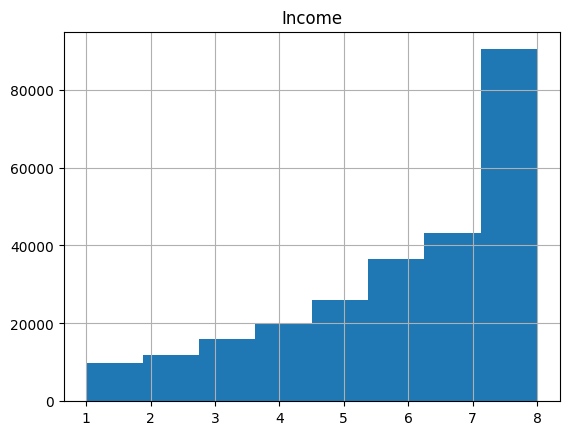

In [9]:
def plot_histogram(df, col): 
    bincount=df[col].unique().size
    ax = df.hist(column=col,bins=bincount) 
    
ordinal_features = ['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']


for col in ordinal_features:
    plot_histogram(df,col)

<h3>Correlation Analysis</h3>

<Axes: >

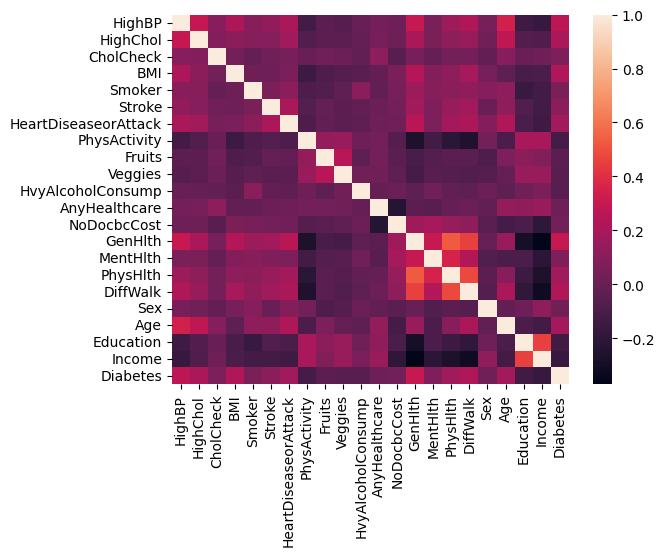

In [10]:
import seaborn as sns
sns.heatmap(df.corr())

<h3>Model Training</h3>

In [30]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier # Import Random Tree Classifier


def separate_features_from_label_and_split_the_data(df, features, label, test_size, random_state=0):
    #Convert prediabetes to diabetes classification. As Prediabetes is a stage before full-on diabetes, it is just as important as Diabetes.
    df['Diabetes']=df['Diabetes_012']
    df.drop(columns='Diabetes_012', inplace=True)
    df[df['Diabetes']==2]=1
    # Encode the target variable using LabelEncoder
    label_encoder = LabelEncoder()
    df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'])
    # Separate features from label
    X, y = df[features], df[label]
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    return X_train, X_test, y_train, y_test

df=pd.read_csv('.\data\Diabetes\DiabetesData.csv')    
features=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies', 'HvyAlcoholConsump',
'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']
label='Diabetes'

X_train, X_test, y_train, y_test = separate_features_from_label_and_split_the_data(df, features, label, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

<h4>Decision Tree Classifier</h4>
<p>Decision Tree Classifier. It allows for all features. A slight modification has to be done to the data in order for this to work. Diabetes is transformed from a 0 = no diabetes,1 = prediabetes,2 =  classification</p>

In [39]:
clf=DecisionTreeClassifier(criterion="gini",max_depth=5,max_features=20)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)    


def evaluatemodel(predictions):
    cm = confusion_matrix(y_test,predictions)
    
    print('Confusion Matrix:\n',cm, '\n')
    print('Highest Accuracy was:', accuracy_score(y_test,predictions))
    print("Overall Precision:", precision_score(y_test,predictions))
    print("Overall Recall:", recall_score(y_test,predictions))

evaluatemodel(predictions)

Confusion Matrix:
 [[63992     0]
 [ 1358 10754]] 

Highest Accuracy was: 0.9821559970566593
Overall Precision: 1.0
Overall Recall: 0.8878797886393659


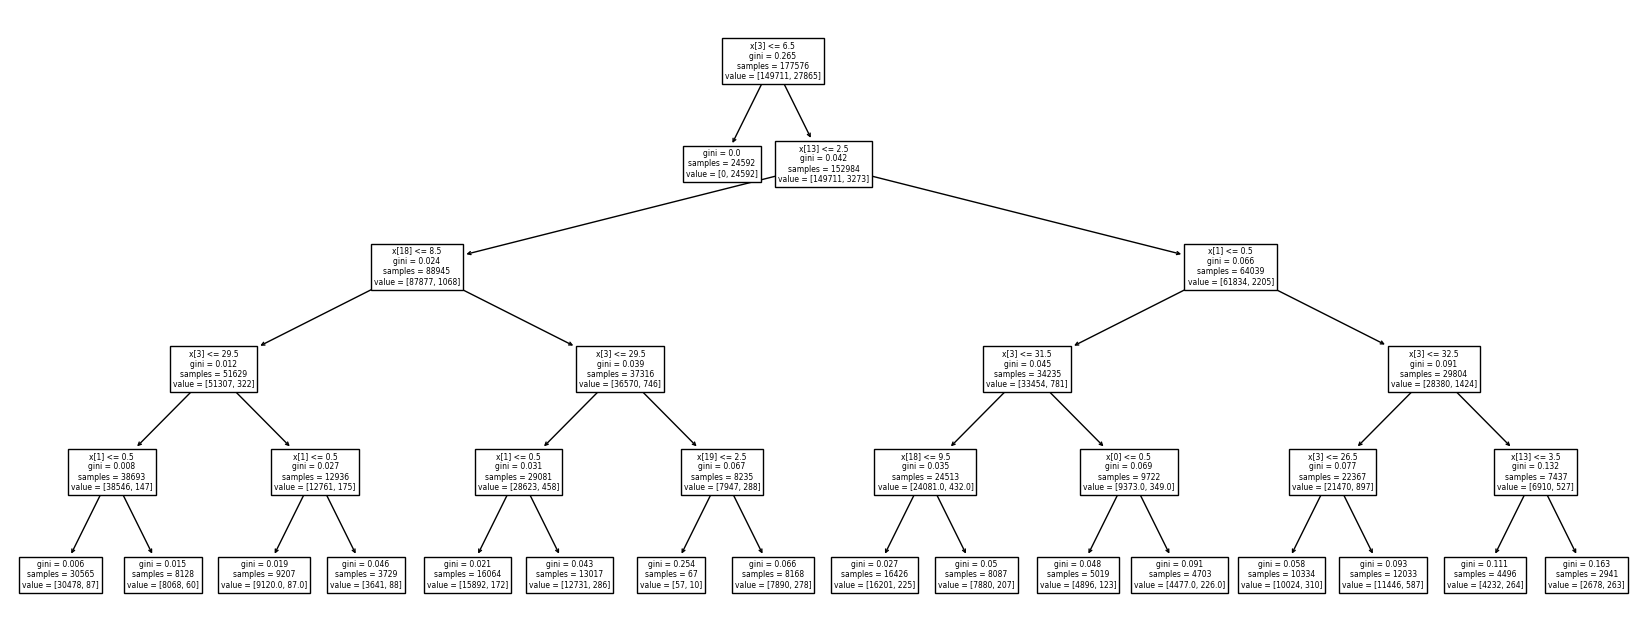

The tree's max depth is:  5  and it has  33  nodes.
Feature 0:  HighBP Score: 6.6e-05
Feature 1:  HighChol Score: 0.000566
Feature 2:  CholCheck Score: 0.0
Feature 3:  BMI Score: 0.998083
Feature 4:  Smoker Score: 0.0
Feature 5:  Stroke Score: 0.0
Feature 6:  HeartDiseaseorAttack Score: 0.0
Feature 7:  PhysActivity Score: 0.0
Feature 8:  Fruits Score: 0.0
Feature 9:  Veggies Score: 0.0
Feature 10:  HvyAlcoholConsump Score: 0.0
Feature 11:  AnyHealthcare Score: 0.0
Feature 12:  NoDocbcCost Score: 0.0
Feature 13:  GenHlth Score: 0.001003
Feature 14:  MentHlth Score: 0.0
Feature 15:  PhysHlth Score: 0.0
Feature 16:  DiffWalk Score: 0.0
Feature 17:  Sex Score: 0.0
Feature 18:  Age Score: 0.000239
Feature 19:  Education Score: 4.3e-05
Feature 20:  Income Score: 0.0


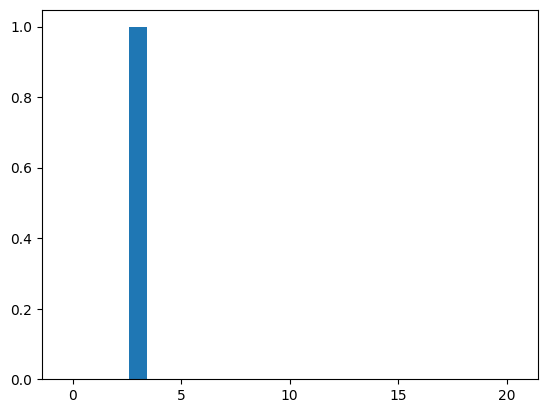

In [13]:
#Reusable functions to display model information.
def displaytrees(storedtree):
    #If the tree is too big, it can't be plotted.
    if not(storedtree.tree_.max_depth>10 or storedtree.tree_.node_count>40):
        fig = plt.subplots(figsize=(21, 8))
        tree.plot_tree(storedtree)
        plt.show()
    print ("The tree's max depth is: ", storedtree.tree_.max_depth," and it has ", storedtree.tree_.node_count, " nodes.")

def displayfeatureimportance(model):
    #For each model type, the variables are different.
    if (isinstance(model,linear_model.LinearRegression)):
        importance=model.coef_
    elif (isinstance(model, tree.DecisionTreeClassifier)):
        importance=model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature '+str(i)+":  "+features[i]+' Score: '+str(round(v,6)))
    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

#display initial tree and its feature importance
displaytrees(clf)
displayfeatureimportance(clf)

<h4>Random Forest Classifier</h4>

In [14]:
#RANDOM FOREST

clf=RandomForestClassifier(criterion="gini",max_depth=5,max_features=4,n_estimators=10)
clf=clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
evaluatemodel(predictions)

Confusion Matrix:
 [[63992     0]
 [ 1358 10754]] 

Highest Accuracy was: 0.9821559970566593
Overall Precision: 1.0
Overall Recall: 0.8878797886393659


In [15]:
##Random Forest Tree Plotting

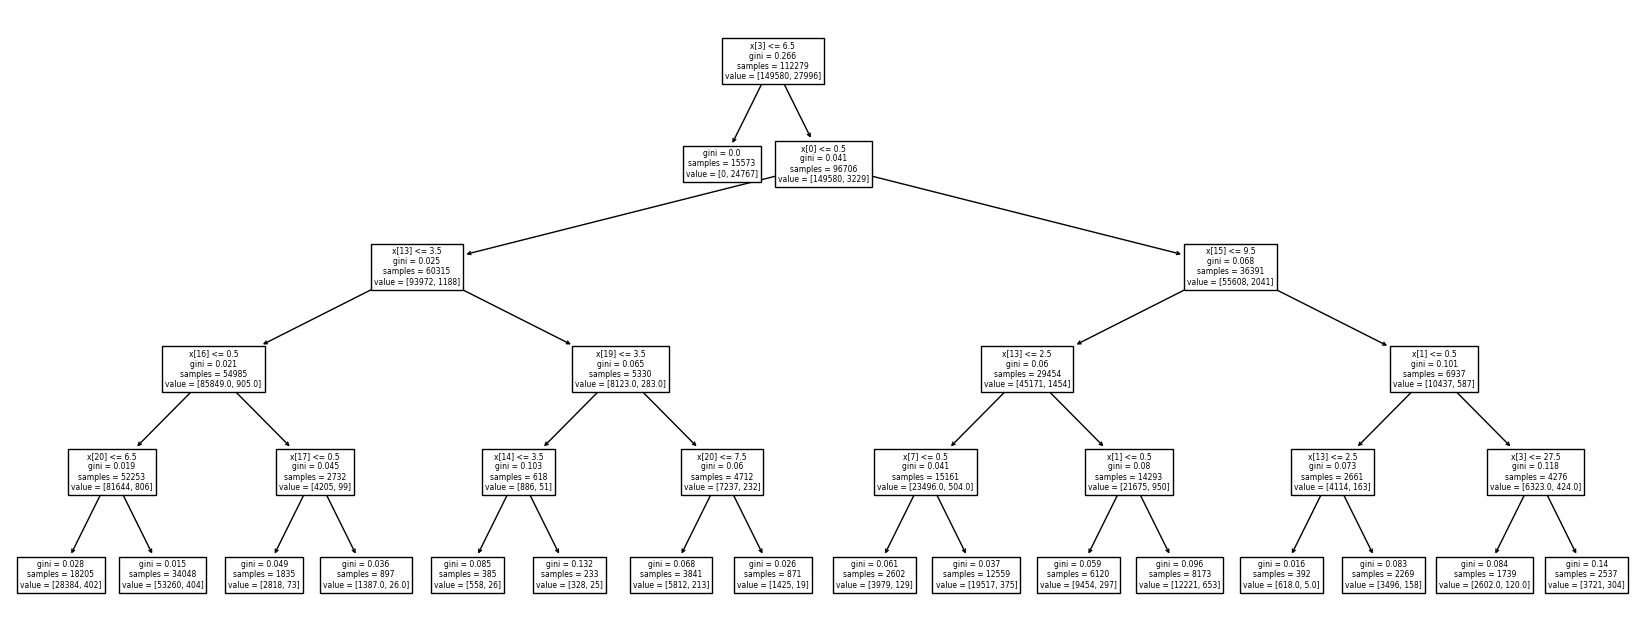

In [16]:
i_tree=0
for tree_in_forest in clf.estimators_:
    if (i_tree<1):
        fig = plt.subplots(figsize=(21, 8))
        tree.plot_tree(tree_in_forest)
        i_tree=i_tree+1
plt.show()

<h5>Hyperparameter Tuning</h5>

<p>Hyperparameter tuning with tree depth and runs through 20 times to test for depth.</p>

In [17]:
features=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies', 'HvyAlcoholConsump',
'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']
X=df[features]
Y='Diabetes'

highestascore=0
ascoredepth=0
highestpscore=0
pscoredepth=0
highestrscore=0
rscoredepth=0

for n in range (1,20):
    clf=DecisionTreeClassifier(criterion="gini",max_depth=n,max_features=20)
    clf=clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)    
    cm = confusion_matrix(y_test,predictions)

    ascore=accuracy_score(y_test,predictions)
    pscore=precision_score(y_test,predictions)
    rscore=recall_score(y_test,predictions)
    if ascore>highestascore:
        highestascore=ascore
        ascoredepth=n
        cm1=cm
        clf1=clf
    if pscore>highestpscore:
        highestpscore=pscore
        pscoredepth=n
        cm2=cm
        clf2=clf
    if rscore>highestrscore:
        highestrscore=rscore
        rscoredepth=n
        cm3=cm
        clf3=clf

storedtrees=[clf1,clf2,clf3]
print('Highest Accuracy was:', highestascore,' with ', ascoredepth, 'as its depth')
print(cm1)
print("Highest Precision:", highestpscore,' with ', pscoredepth, 'as its depth')
print(cm2)
print("Highest Recall:", highestrscore,' with ', rscoredepth, 'as its depth')
print(cm3)

Highest Accuracy was: 0.9821559970566593  with  1 as its depth
[[63992     0]
 [ 1358 10754]]
Highest Precision: 1.0  with  1 as its depth
[[63992     0]
 [ 1358 10754]]
Highest Recall: 0.8929161162483488  with  19 as its depth
[[62683  1309]
 [ 1297 10815]]


<p>Result: Accuracy and Dept get worse as depth increases. They both use the same feature for splitting. This is different for Recall however.</p>

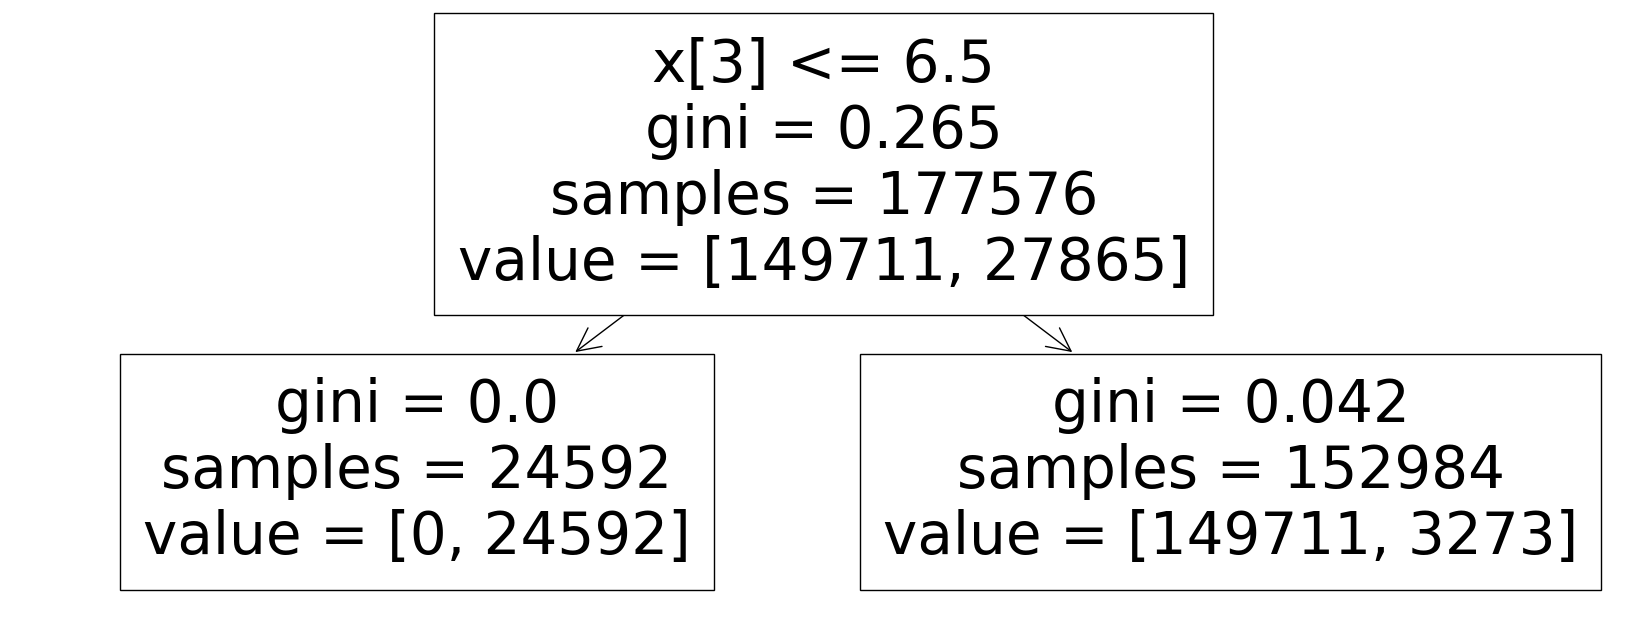

The tree's max depth is:  1  and it has  3  nodes.
Feature 0:  HighBP Score: 0.0
Feature 1:  HighChol Score: 0.0
Feature 2:  CholCheck Score: 0.0
Feature 3:  BMI Score: 1.0
Feature 4:  Smoker Score: 0.0
Feature 5:  Stroke Score: 0.0
Feature 6:  HeartDiseaseorAttack Score: 0.0
Feature 7:  PhysActivity Score: 0.0
Feature 8:  Fruits Score: 0.0
Feature 9:  Veggies Score: 0.0
Feature 10:  HvyAlcoholConsump Score: 0.0
Feature 11:  AnyHealthcare Score: 0.0
Feature 12:  NoDocbcCost Score: 0.0
Feature 13:  GenHlth Score: 0.0
Feature 14:  MentHlth Score: 0.0
Feature 15:  PhysHlth Score: 0.0
Feature 16:  DiffWalk Score: 0.0
Feature 17:  Sex Score: 0.0
Feature 18:  Age Score: 0.0
Feature 19:  Education Score: 0.0
Feature 20:  Income Score: 0.0


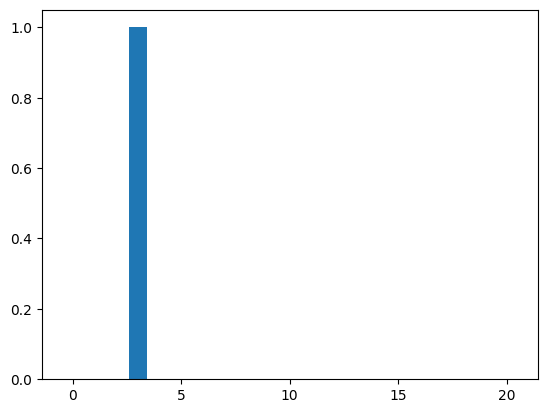

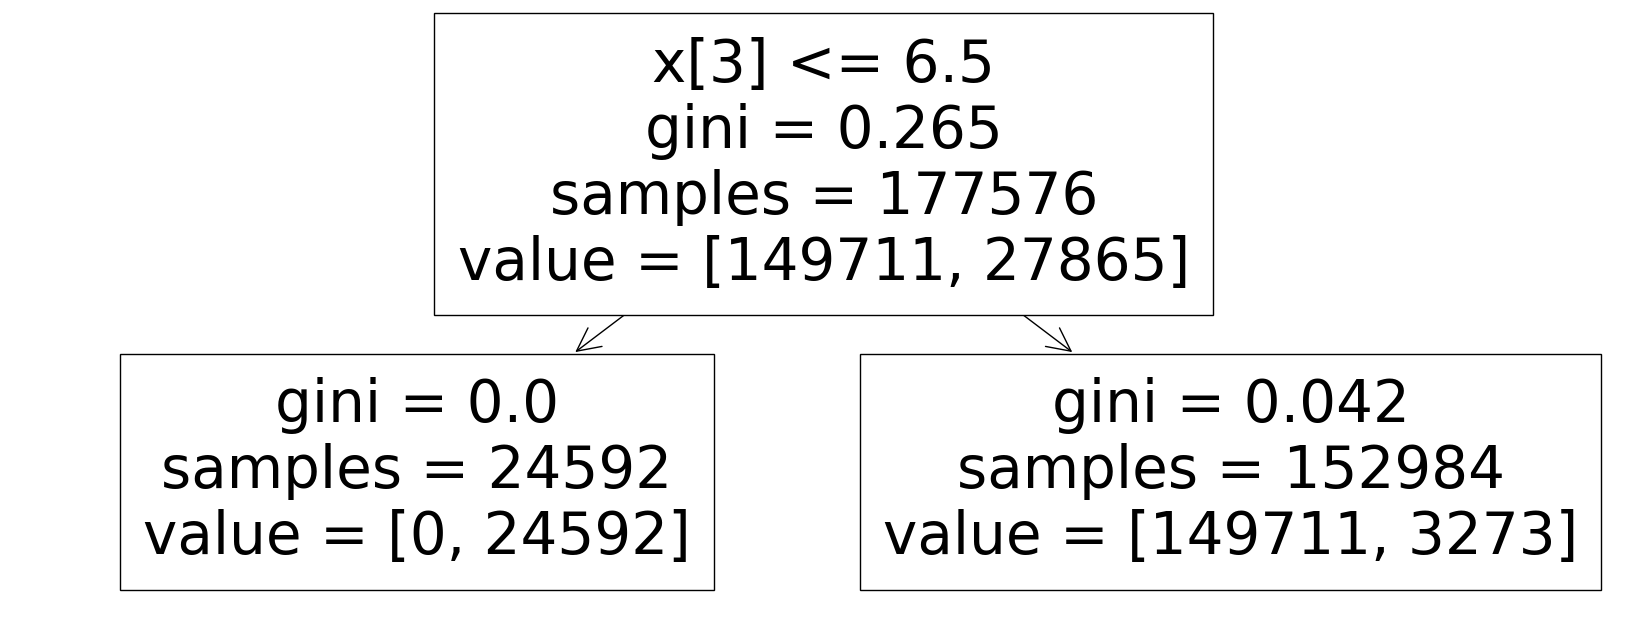

The tree's max depth is:  1  and it has  3  nodes.
Feature 0:  HighBP Score: 0.0
Feature 1:  HighChol Score: 0.0
Feature 2:  CholCheck Score: 0.0
Feature 3:  BMI Score: 1.0
Feature 4:  Smoker Score: 0.0
Feature 5:  Stroke Score: 0.0
Feature 6:  HeartDiseaseorAttack Score: 0.0
Feature 7:  PhysActivity Score: 0.0
Feature 8:  Fruits Score: 0.0
Feature 9:  Veggies Score: 0.0
Feature 10:  HvyAlcoholConsump Score: 0.0
Feature 11:  AnyHealthcare Score: 0.0
Feature 12:  NoDocbcCost Score: 0.0
Feature 13:  GenHlth Score: 0.0
Feature 14:  MentHlth Score: 0.0
Feature 15:  PhysHlth Score: 0.0
Feature 16:  DiffWalk Score: 0.0
Feature 17:  Sex Score: 0.0
Feature 18:  Age Score: 0.0
Feature 19:  Education Score: 0.0
Feature 20:  Income Score: 0.0


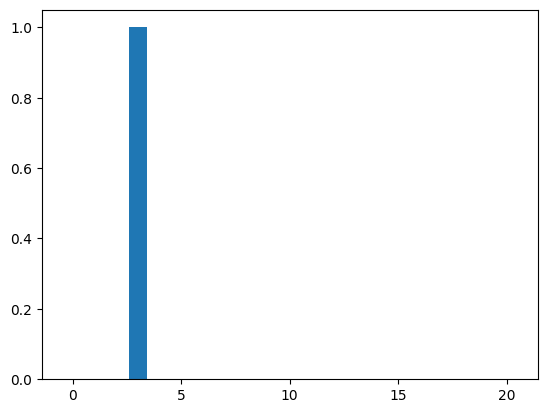

The tree's max depth is:  19  and it has  12461  nodes.
Feature 0:  HighBP Score: 0.002295
Feature 1:  HighChol Score: 0.000966
Feature 2:  CholCheck Score: 0.000583
Feature 3:  BMI Score: 0.914455
Feature 4:  Smoker Score: 0.003689
Feature 5:  Stroke Score: 0.001394
Feature 6:  HeartDiseaseorAttack Score: 0.002254
Feature 7:  PhysActivity Score: 0.003879
Feature 8:  Fruits Score: 0.003732
Feature 9:  Veggies Score: 0.003105
Feature 10:  HvyAlcoholConsump Score: 0.001251
Feature 11:  AnyHealthcare Score: 0.001265
Feature 12:  NoDocbcCost Score: 0.0014
Feature 13:  GenHlth Score: 0.003452
Feature 14:  MentHlth Score: 0.009492
Feature 15:  PhysHlth Score: 0.010228
Feature 16:  DiffWalk Score: 0.002906
Feature 17:  Sex Score: 0.003919
Feature 18:  Age Score: 0.011419
Feature 19:  Education Score: 0.008133
Feature 20:  Income Score: 0.010182


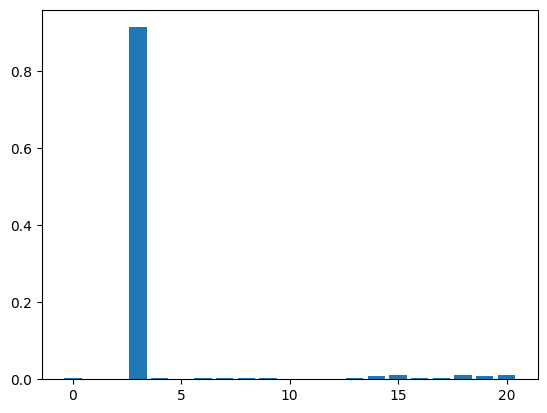

In [18]:
for x in storedtrees:
    displaytrees(x)
    displayfeatureimportance(x)

<p>According to the binary tree, BMI is the best feature to split on. There are no better splits. 
<br>Note: The third binary tree cannot be visually displayed due to its size.</p>

<p>Overall, BMI is the strongest feature to classify with. However, Education is the next best feature.
##Note: Sometimes its Education, sometimes its Income. This is because the two features are correlated. This confuses the model as they are both very good features to split on.</p>

<p>Decision Tree model training without BMI or Education as a feature</p>

In [19]:
df=pd.read_csv('.\data\Diabetes\DiabetesData.csv')    
features=['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies', 'HvyAlcoholConsump',
'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Income']
label='Diabetes'

X_train, X_test, y_train, y_test = separate_features_from_label_and_split_the_data(df, features, label, test_size=0.30, random_state=0)


highestascore=0;ascoredepth=0;highestpscore=0;pscoredepth=0;highestrscore=0;rscoredepth=0;

for n in range (1,20):
    clf=DecisionTreeClassifier(criterion="gini",max_depth=n,max_features=20)
    clf=clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)    
    cm = confusion_matrix(y_test,predictions)

    ascore=accuracy_score(y_test,predictions)
    pscore=precision_score(y_test,predictions)
    rscore=recall_score(y_test,predictions)
    if ascore>highestascore:
        highestascore=ascore
        ascoredepth=n
        cm1=cm
        clf1=clf
    if pscore>highestpscore:
        highestpscore=pscore
        pscoredepth=n
        cm2=cm
        clf2=clf
    if rscore>highestrscore:
        highestrscore=rscore
        rscoredepth=n
        cm3=cm
        clf3=clf

storedtrees=[clf1,clf2,clf3]
print('Highest Accuracy was:', highestascore,' with ', ascoredepth, 'as its depth')
print(cm1)
print("Highest Precision:", highestpscore,' with ', pscoredepth, 'as its depth')
print(cm2)
print("Highest Recall:", highestrscore,' with ', rscoredepth, 'as its depth')
print(cm3)

Highest Accuracy was: 0.9821428571428571  with  8 as its depth
[[63991     1]
 [ 1358 10754]]
Highest Precision: 0.999907019990702  with  8 as its depth
[[63991     1]
 [ 1358 10754]]
Highest Recall: 0.8912648612945839  with  19 as its depth
[[63021   971]
 [ 1317 10795]]


The tree's max depth is:  8  and it has  313  nodes.
Feature 0:  HighBP Score: 0.000308
Feature 1:  HighChol Score: 0.001252
Feature 2:  CholCheck Score: 6e-06
Feature 3:  Smoker Score: 2.5e-05
Feature 4:  Stroke Score: 1.9e-05
Feature 5:  HeartDiseaseorAttack Score: 0.166855
Feature 6:  PhysActivity Score: 6.9e-05
Feature 7:  Fruits Score: 6.5e-05
Feature 8:  Veggies Score: 6.7e-05
Feature 9:  HvyAlcoholConsump Score: 1.1e-05
Feature 10:  AnyHealthcare Score: 8.4e-05
Feature 11:  NoDocbcCost Score: 0.000114
Feature 12:  GenHlth Score: 0.001173
Feature 13:  MentHlth Score: 0.000219
Feature 14:  PhysHlth Score: 0.000138
Feature 15:  DiffWalk Score: 3.5e-05
Feature 16:  Sex Score: 3e-05
Feature 17:  Age Score: 0.829286
Feature 18:  Income Score: 0.000245


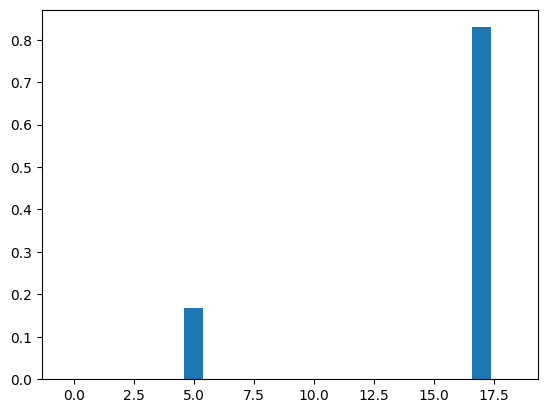

The tree's max depth is:  8  and it has  313  nodes.
Feature 0:  HighBP Score: 0.000308
Feature 1:  HighChol Score: 0.001252
Feature 2:  CholCheck Score: 6e-06
Feature 3:  Smoker Score: 2.5e-05
Feature 4:  Stroke Score: 1.9e-05
Feature 5:  HeartDiseaseorAttack Score: 0.166855
Feature 6:  PhysActivity Score: 6.9e-05
Feature 7:  Fruits Score: 6.5e-05
Feature 8:  Veggies Score: 6.7e-05
Feature 9:  HvyAlcoholConsump Score: 1.1e-05
Feature 10:  AnyHealthcare Score: 8.4e-05
Feature 11:  NoDocbcCost Score: 0.000114
Feature 12:  GenHlth Score: 0.001173
Feature 13:  MentHlth Score: 0.000219
Feature 14:  PhysHlth Score: 0.000138
Feature 15:  DiffWalk Score: 3.5e-05
Feature 16:  Sex Score: 3e-05
Feature 17:  Age Score: 0.829286
Feature 18:  Income Score: 0.000245


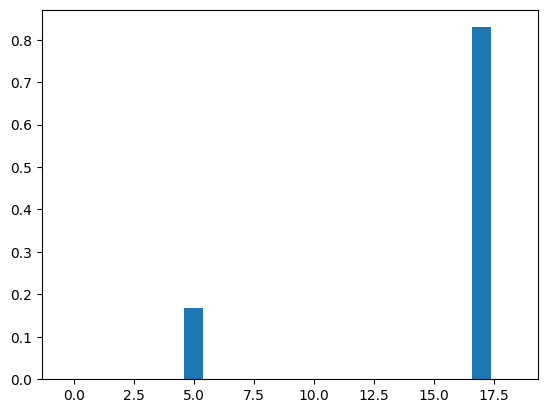

The tree's max depth is:  19  and it has  12523  nodes.
Feature 0:  HighBP Score: 0.001012
Feature 1:  HighChol Score: 0.001157
Feature 2:  CholCheck Score: 0.000746
Feature 3:  Smoker Score: 0.0038
Feature 4:  Stroke Score: 0.001739
Feature 5:  HeartDiseaseorAttack Score: 0.156418
Feature 6:  PhysActivity Score: 0.004205
Feature 7:  Fruits Score: 0.004693
Feature 8:  Veggies Score: 0.003918
Feature 9:  HvyAlcoholConsump Score: 0.00107
Feature 10:  AnyHealthcare Score: 0.001147
Feature 11:  NoDocbcCost Score: 0.001522
Feature 12:  GenHlth Score: 0.003234
Feature 13:  MentHlth Score: 0.009987
Feature 14:  PhysHlth Score: 0.011221
Feature 15:  DiffWalk Score: 0.00254
Feature 16:  Sex Score: 0.004306
Feature 17:  Age Score: 0.777553
Feature 18:  Income Score: 0.009732


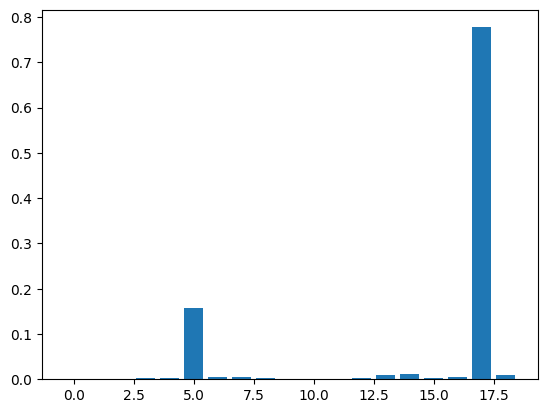

In [20]:
for x in storedtrees:
    displaytrees(x)
    displayfeatureimportance(x)

<p>In the absence of BMI and Education as a feature for splitting, the next best features for splits is Age and HeartDisease history.</p>

<h4>Multiple Linear Regression</h4>

Confusion Matrix:
 [[63935    57]
 [ 1355 10757]] 

Highest Accuracy was: 0.9814464417113423
Overall Precision: 0.994729054928796
Overall Recall: 0.8881274768824307
Feature 0:  HighBP Score: 0.033925
Feature 1:  HighChol Score: 0.03777
Feature 2:  CholCheck Score: 0.023041
Feature 3:  Smoker Score: 0.006395
Feature 4:  Stroke Score: 0.239839
Feature 5:  HeartDiseaseorAttack Score: 0.108886
Feature 6:  PhysActivity Score: 0.010319
Feature 7:  Fruits Score: 0.021187
Feature 8:  Veggies Score: 0.010285
Feature 9:  HvyAlcoholConsump Score: 0.136797
Feature 10:  AnyHealthcare Score: 0.060654
Feature 11:  NoDocbcCost Score: 0.107257
Feature 12:  GenHlth Score: -0.030851
Feature 13:  MentHlth Score: -0.001439
Feature 14:  PhysHlth Score: -0.001391
Feature 15:  DiffWalk Score: 0.090367
Feature 16:  Sex Score: 0.022377
Feature 17:  Age Score: -0.011226
Feature 18:  Income Score: -0.015068


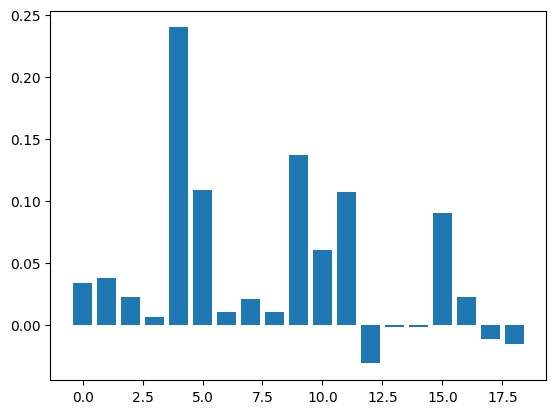

In [21]:
df=pd.read_csv('.\data\Diabetes\DiabetesData.csv')    
features=['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies', 'HvyAlcoholConsump',
'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Income']
label='Diabetes'

X_train, X_test, y_train, y_test = separate_features_from_label_and_split_the_data(df, features, label, test_size=0.30, random_state=0)

regr= linear_model.LinearRegression()
regr=regr.fit(X_train,y_train)
predictions = regr.predict(X_test)    

y_test=y_test.to_numpy()

#Arbitrary conversion to binary values. I need to do this properly but I dont know how.
for x in range(len(predictions)):
    if (predictions[x]>0.5):
        predictions[x]=1
    else:
        predictions[x]=0

evaluatemodel(predictions)
displayfeatureimportance(regr)

## Pipeline 

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd


df=pd.read_csv('.\data\Diabetes\DiabetesData.csv')    
X_train, X_test, y_train, y_test = separate_features_from_label_and_split_the_data(df, features, label, test_size=0.3, random_state=0)
label_encoder = LabelEncoder()
df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'])

ordinal_categorical_features = ['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']
c1_idx = [df.columns.get_loc(item) for item in ordinal_categorical_features]
onehot_categorical_features = ['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack'
                               ,'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']
c2_idx = [df.columns.get_loc(item) for item in onehot_categorical_features]

# Create transformers for categorical features
ordinal_encoder = OrdinalEncoder()
ordinal_categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

onehot_categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply transformers to features using ColumnTransformer
feature_transformer = ColumnTransformer(
    transformers=[
        ('cat1', ordinal_categorical_transformer, c1_idx),
        ('cat2', onehot_categorical_transformer, c2_idx),
    ])
column_imputer = Pipeline (steps = [
    ('imputer', KNNImputer())
])
missing_value_imputer = ColumnTransformer(
    transformers = [
        ('imputer',column_imputer, c1_idx+ c2_idx)
    ]
)
# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Create the pipeline
pipeline = Pipeline(steps=[('transformers', feature_transformer),('imputer', missing_value_imputer), ('classifier', knn_model)])

from sklearn import set_config
set_config(display="diagram")
pipeline

Pipeline(steps=[('transformers',
                 ColumnTransformer(transformers=[('cat1',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  [3, 13, 14, 15, 18, 19, 20]),
                                                 ('cat2',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 16, 17])])),
                ('imputer',
                 ColumnTransformer(transformers=[('imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  [3, 13, 14, 15, 18, 19, 20, 0,
                                                   1, 2, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 16, 17])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [24]:
### KNN Using Pipeline

In [34]:
pipeline.fit(X_train, y_train)

cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Confusion Matrix:
 [[63935    57]
 [ 1355 10757]] 

Accuracy: 0.9814464417113423
Overall Precision: 0.994729054928796
Overall Recall: 0.8881274768824307


In [ ]:
### Naive Bayes using Pipeline

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pipeline.set_params(KNeighborsClassifier = gnb)
pipeline

In [ ]:
pipeline.fit(X_train, y_train)

cm = confusion_matrix(y_test, predictions) 
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

<h4>Probabilistic Analysis Bernoulli Distribution</h4>

In [ ]:
probabilities = df['Diabetes'].value_counts(normalize=True) # The probabilities of either having diabetes or not
print(probabilities)
probabilities.plot(kind='bar')
plt.xlabel('Diabetes Risk Potenial')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution')

plt.show()


<h4>Probability Distribution Binomial</h4>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import binom
import math


for feature_name in categorical_features: 
    # Calculate the proportion of individuals with diabetes having high feature, cholestral, BMI and etc
    db1 = df[df[categorical_features] == 1.0]
    total_val = len(db1)
    #print(total_val)
    high_ft_val = (db1[feature_name] == 1).sum()
    #print(high_ft_val)
    high_val_prob = high_ft_val / total_val
    print(feature_name)
    print(high_val_prob)
    # Define the parameters for the binomial distribution
    n = 6  # Sample size
    p  = high_val_prob  # Probability of having high cholesterol given diabetes

    # Generate the range of values for x
    r_values = list(range(n+1))

    prob1 = []
    cumulative_prob = 0
    for i in range(n+1):
        m = math.comb(n,i)
        prob = m * (p ** i) * ((1 - p) ** (n - i))    
        cumulative_prob += prob
        prob1.append(prob)

    for i,prob in enumerate(prob1):
        print(prob)
    # Calculate the probability mass function (pmf) for each value of x
    pmf = [binom.pmf(r,n,p) for r in r_values]
    # Plot the binomial distribution
    plt.bar(r_values, pmf)

    # Add labels and title
    plt.xlabel(f'Number of Diabetic Individuals with {feature_name}')
    plt.ylabel('Probability')
    plt.title(f'Binomial Distribution (n = {n}, p = {p}) for Diabetic and {feature_name}')

    # Show plot
    plt.show()